In [1]:
import pandas as pd

from pandas_datareader import data
from datetime import datetime
from dateutil.relativedelta import relativedelta

In [25]:
fig_size = (15, 5)
today = datetime.today().strftime('%Y-%m-%d')
start_date = '1900-01-02'
end_date = today
three_months = (datetime.today()-relativedelta(months=3)).strftime('%Y-%m-%d')
six_months = (datetime.today()-relativedelta(months=6)).strftime('%Y-%m-%d')
one_year = (datetime.today()-relativedelta(years=1)).strftime('%Y-%m-%d')

In [3]:
tickers = ['AMZN', 'AAPL', 'FB', 'GOOGL', 'MSFT', 'UBER',
           'XOM', 'BA', 'DAL', 'UAL', 'AAL',
           'SMH', 'XLE', 'IVV', 'VNQ', 'VCSH']

num_shares = {'AMZN': 17, 'AAPL': 208, 'FB': 74, 'GOOGL': 10, 'MSFT': 87, 'UBER': 554,
              'XOM': 361, 'BA': 87, 'DAL': 141, 'UAL': 129, 'AAL': 316,
              'SMH': 57, 'XLE': 431, 'IVV': 64, 'VNQ': 118, 'VCSH': 384, 'CASH': 108443}

cost_basis = {'AMZN': 1708.54, 'AAPL': 45.57, 'FB': 168.62, 'GOOGL': 1110.79, 'MSFT': 95.20, 'UBER': 21.65,
              'XOM': 41.51, 'BA': 137.98, 'DAL': 23.61, 'UAL': 25.73, 'AAL': 10.54,
              'SMH': 110.00, 'XLE': 30.12, 'IVV': 267.39, 'VNQ': 76.10, 'VCSH': 78.07, 'CASH': 1}

asset_type = {'AMZN': 'Stock', 'AAPL': 'Stock', 'FB': 'Stock', 'GOOGL': 'Stock', 'MSFT': 'Stock', 'UBER': 'Stock',
              'XOM': 'Stock', 'BA': 'Stock', 'DAL': 'Stock', 'UAL': 'Stock', 'AAL': 'Stock',
              'SMH': 'ETF', 'XLE': 'ETF', 'IVV': 'Index', 'VNQ': 'REIT', 'VCSH': 'Bond', 'CASH': 'Cash'}

In [4]:
df = pd.DataFrame()

for ticker in tickers:
    df_temp = data.DataReader(ticker, 'yahoo', start_date, end_date).reset_index()[['Date', 'Close']]
    df_temp['Ticker'] = [ticker] * len(df_temp)
    df_temp['Shares'] = [num_shares[ticker]] * len(df_temp)
    df_temp['Type'] = [asset_type[ticker]] * len(df_temp)
    df_temp['Cost'] = [cost_basis[ticker]] * len(df_temp)
    df = df.append(df_temp)

df['Market Value'] = df['Shares'] * df['Close']
df['Cost Basis'] = df['Shares'] * df['Cost']
df['Change'] = df['Market Value'] - df['Cost Basis']
df['Change %'] = 100*df['Change']/df['Cost Basis']

df_final = df.groupby(['Ticker']).tail(1).set_index('Ticker')
df_final

,Date,Close,Shares,Type,Cost,Market Value,Cost Basis,Change,Change %
Ticker,,,,,,,,,
AMZN,2020-11-13,3128.810059,17,Stock,1708.54,53189.770996,29045.18,24144.590996,83.127703
AAPL,2020-11-13,119.260002,208,Stock,45.57,24806.080444,9478.56,15327.520444,161.707268
FB,2020-11-13,276.950012,74,Stock,168.62,20494.300903,12477.88,8016.420903,64.245055
GOOGL,2020-11-13,1772.260010,10,Stock,1110.79,17722.600098,11107.90,6614.700098,59.549511
MSFT,2020-11-13,216.509995,87,Stock,95.20,18836.369522,8282.40,10553.969522,127.426465
UBER,2020-11-13,47.610001,554,Stock,21.65,26375.940338,11994.10,14381.840338,119.907624
XOM,2020-11-13,36.080002,361,Stock,41.51,13024.880661,14985.11,-1960.229339,-13.081181
BA,2020-11-13,187.110001,87,Stock,137.98,16278.570053,12004.26,4274.310053,35.606610
DAL,2020-11-13,36.459999,141,Stock,23.61,5140.859871,3329.01,1811.849871,54.426087


In [5]:
df_final_type = df_final.groupby('Type').sum()[['Market Value', 'Cost Basis']]
df_final_type['Change'] = df_final_type['Market Value'] - df_final_type['Cost Basis']
df_final_type['Change %'] = 100 * df_final_type['Change'] / df_final_type['Cost Basis']
df_final_type

,Market Value,Cost Basis,Change,Change %
Type,,,,
Bond,31814.399414,29978.88,1835.519414,6.122708
ETF,25785.680286,19251.72,6533.960286,33.939618
Index,22997.759766,17112.96,5884.799766,34.387971
REIT,10074.839676,8979.80,1095.039676,12.194477
Stock,204766.923031,119354.21,85412.713031,71.562380


<AxesSubplot:title={'center':'Cost basis by asset type'}, ylabel='Cost Basis'>

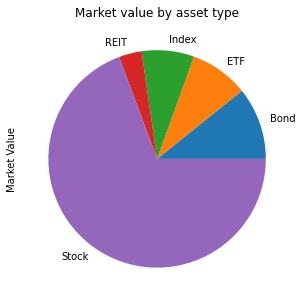

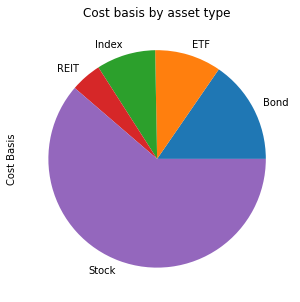

In [27]:
df_final_type.plot(y='Market Value', kind='pie',
                   figsize=fig_size, grid=True, title='Market value by asset type', legend=False)
df_final_type.plot(y='Cost Basis', kind='pie',
                   figsize=fig_size, grid=True, title='Cost basis by asset type', legend=False)

In [6]:
mkt_val = (df.groupby('Date').sum()['Market Value'] + num_shares['CASH'])
mkt_val = mkt_val.reset_index()
mkt_val

,Date,Market Value
0,1962-01-02,109084.308062
1,1962-01-03,109094.201097
2,1962-01-04,109094.895205
3,1962-01-05,109080.771701
4,1962-01-08,109079.540557
...,...,...
14816,2020-11-09,403327.679180
14817,2020-11-10,400021.699337
14818,2020-11-11,402076.495850
14819,2020-11-12,399173.237736


<AxesSubplot:title={'center':'Portfolio Value'}, xlabel='Date'>

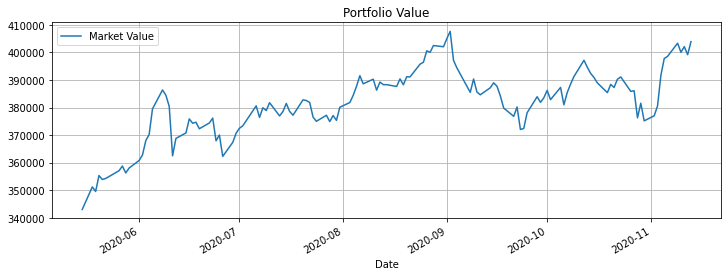

In [7]:
mkt_val[(mkt_val['Date'] >= six_months) & (mkt_val['Date'] <= end_date)].plot(
    x='Date', y=['Market Value'],
    figsize=fig_size, grid=True, title='Portfolio Value')